<a href="https://colab.research.google.com/github/rimchristian/Hotel-Reservation-ML-Model/blob/main/HotelReservations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Description**

### **Task**
The aim is to predict if the customer is going to honor the reservation or cancel it?

### **Data Dictionary:**

**Features** | **Description**  
--- | ---
hotel | H1 = Resort Hotel or H2 = City Hotel
is_canceled | showing if the booking had been cancelled (1) or Not(0)
adults | Number of adults 
children | Number of children
babies | Number of babies
stays_in_weekend_nights | Number of weekend stay at night (Saturday or Sunday) the guest stayed or booked to stay at the hotel. 
stays_in_weekday_nights | Number of weekdays stays at night (M-F) in the hotel
meal_plan | Type of meal booked
required_car_parking_space | How many parking areas are neccsary for the customers
assigned_room_type | code for the type of room assigned to the booking. Code is presented instead of designation for anonymity reasons. 
booking_changes | how many times did booking changes happen
deposit_type | indication on if the customer deposited something to confirm the booking. 
agent | if the booking happens through agents or not
company | if the booking happens through companies, the company ID that made the booking or responsible for paying the booking
days_in_waiting_list | Number of days the booking was on the waiting list before the confirmation to the customer
customer_type | Booking type like Transient - Transient-Party - Contract - Group
adr | Average Daily Rates that described via way of means of dividing the sum of all accommodations transactions using entire numbers of staying nights
lead_time | Number of days that elaposed between the entering date of the booking into the PMS and the arrival date. 
arrival_date_year | Year of arrival date
arrival_date_month  | The months in which guests are coming 
arrival_date_week_number | Week number of year for arrival date
arrival_date_day_of_month | Which day of the months guest is arriving
market_segment_type | through which channel hotels were booked
repeated_guest | the values indicating if the booking name was from a repeated guest (1) or not (0)
no_of_previous_cancellations | show if the repeated guest has cancelled the booking before
no_of_previous_not_cancellations | Show if the repeated guest has not cancelled the booking before
avg_price_per_room | Average Price/Room that describes  the way of means of dividing the sum of all accommodations transactions using entire number of staying nights.
no_of_special_reports | total unique requests from consumers
reservation_status | No-Show(0), Canceled (1) or Check-In (2)


###**Import Libraries**

In [3]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## MatPlotLib
import matplotlib.pyplot as plt
# seaborn
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer


## Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Boosting Algorithm 
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

## Classification Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, \
RocCurveDisplay,  roc_auc_score

from sklearn.model_selection import GridSearchCV

# Import SMOTE
from imblearn.over_sampling import SMOTE
# Import special pipeline for smote
from imblearn.pipeline import make_pipeline as smote_pipe

from sklearn import metrics
## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}
import warnings 
warnings.filterwarnings('ignore')

### **Functions**

In [4]:
## Define a function that takes in arguments and prints out a classification report and confusion matrix
def evaluate_classification(model, X_test, y_test, cmap='Greens',
                            normalize=None, classes=None, figsize=(20,5)):
  """Takes as arguments: a model, features, and labels
  Prints a classification report, confusion matrix
  Optional arguments: 
    cmap: colormap 
    normalize: confusion matrix normalization ['true', 'pred', 'all' or None]
    classes: ordered list of class labels
    figsize: size of figure"""
  test_preds = model.predict(X_test)
  print(metrics.classification_report(y_test, test_preds, 
                                      zero_division=0,
                                      target_names=classes))
  
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=cmap, 
                                display_labels=classes,
                                normalize=normalize)
  plt.show()

In [5]:
## Create a function to display the classification metrics of a model
def classification_metrics(model, X_test, y_test, label='Test Data', 
                             figsize=(15,5), normalize='true',
                             cmap='Greens'): 
                             
    fig, axes = plt.subplots(1,2, figsize=figsize)

    ## Get the predictions
    y_pred = model.predict(X_test)
     
   ## Print classification report for the test data (and make it pretty!)
    print('---'*20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---'*20)

    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test,y_pred, 
                normalize=normalize, cmap=cmap,              
                ax=axes[0])    
    
    RocCurveDisplay.from_estimator(model, X_test, y_test,
                                   ax=axes[1])
    plt.show()

# **Load and Inspect the Data**

In [6]:
filename = '/content/hotel_bookings.csv'
df = pd.read_csv(filename)

In [7]:
# display the first 5 rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/15


In [8]:
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 119390 rows, and 32 columns.
The rows represent 119390 observations, and the columns represent 31 features and 1 target variable.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### **Inspecting**

# **Clean the Data**

## **Missing Values**

In [10]:
# Display the total number of missing values 
print(f'There are {df.isna().sum().sum()} missing values.')

There are 129425 missing values.


In [11]:
# displaying a list of missing values
null = 100*(df.isna().sum()/df.shape[0])
null

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

Column 'company' holds around 94%, so we can drop the column. 

## **Remove Unnecessary Columns**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## **Remove Unnecessary Rows**

In [13]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


## **Inspect Column Names for Errors**

In [14]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## **Inspect Values for Errors**

In [15]:
# displaying the summary statistics for the numeric columns
df.describe(include='number')

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [16]:
# displaying the summary statistics for the categorical columns
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,87396,87396,87396,86944,87396,87396,87396,87396,87396,87396,87396,87396
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2/14/16
freq,53428,11257,67978,27453,51618,69141,56552,46313,86251,71986,63371,211


In [17]:
for col in df.columns:
  if df[col].dtype == 'object' and col != 'country':
    df.loc[df[col].str.contains('NULL'), col] = np.nan
    df.loc[df[col].str.contains('Undefined', na=False), col] = np.nan

null_series = df.isnull().sum()
print(null_series[null_series > 0])

children                    4
meal                      492
country                   452
market_segment              2
distribution_channel        5
agent                   12193
company                 82137
dtype: int64


In [18]:
# dropping na
subset = ['country', 'children', 'market_segment', 'distribution_channel']
df = df.dropna(subset=subset)

The missing values in the 'agent' column means the customer didn't utilize the agency to reserve. Therefore, these reservations can be seen as purchased directly by the customers. We will throw a random number because this column is useful. 

In [19]:
df.loc[df['agent'].isnull(), 'agent'] = 0
df.loc[df['company'].isnull(), 'company'] = 0 
df.loc[df['meal'].isnull(), 'meal'] = 'SC'

In [20]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# **Visualization**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86939 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86939 non-null  object 
 1   is_canceled                     86939 non-null  int64  
 2   lead_time                       86939 non-null  int64  
 3   arrival_date_year               86939 non-null  int64  
 4   arrival_date_month              86939 non-null  object 
 5   arrival_date_week_number        86939 non-null  int64  
 6   arrival_date_day_of_month       86939 non-null  int64  
 7   stays_in_weekend_nights         86939 non-null  int64  
 8   stays_in_week_nights            86939 non-null  int64  
 9   adults                          86939 non-null  int64  
 10  children                        86939 non-null  float64
 11  babies                          86939 non-null  int64  
 12  meal                           

### **Bivariate Visuals**

Text(0.5, 1.0, 'Hotel Bookings for Weekday and Weeknights')

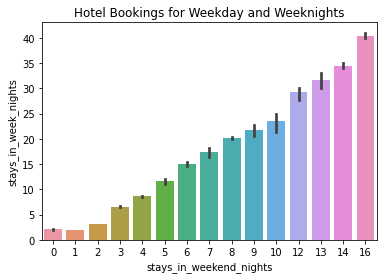

In [22]:
sns.barplot(data=df, x='stays_in_weekend_nights',y='stays_in_week_nights')
plt.title('Hotel Bookings for Weekday and Weeknights')

This barplot shows the amount of length  for both bookings on weeekend and weekday nights. The most amount of bookings happens on Sunday, which is obvious. 

Text(0.5, 0, 'Class')

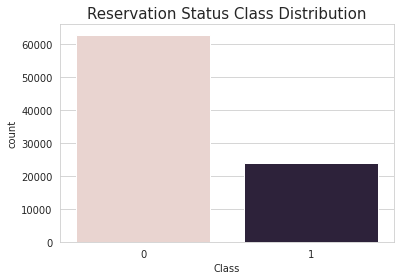

In [23]:
sns.set_style("whitegrid")
ax = sns.countplot(df['is_canceled'], palette=sns.cubehelix_palette(2))
plt.title('Reservation Status Class Distribution', fontsize=15)
plt.xlabel(xlabel='Class')

The two classes were not distributed balanced so the data may be imbalanced. 1 for Canceled and 0 for Not Canceled. 

Text(0.5, 1.0, 'Number of Adults and Children')

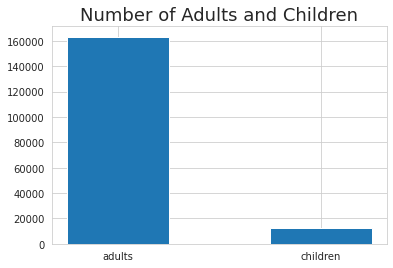

In [24]:
fig, ax = plt.subplots()
ax.bar(np.arange(2), [df['adults'].sum(), df['children'].sum()], width=0.5)
plt.xticks(np.arange(2), ('adults','children'))
plt.title('Number of Adults and Children', fontsize=18)

More adults has booked a room than children. 

Text(0.5, 1.0, 'Average Daily Rates of Each Reserved Room Type')

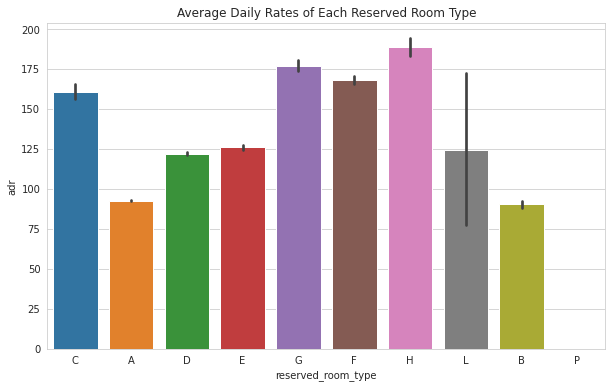

In [25]:
plt.figure(figsize=(10,6))
ax =  sns.barplot(df['reserved_room_type'], df['adr'])
plt.title('Average Daily Rates of Each Reserved Room Type')

Room H is the most expensive one, followed by Room G and F  Room A and B are the cheapest one. 

Text(0.5, 1.0, 'Average Daily Rates of Each Assigned Room Type')

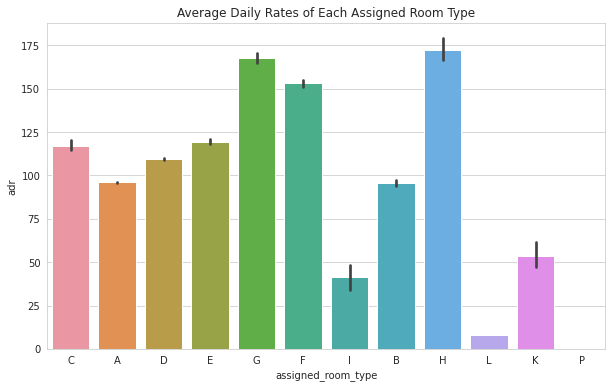

In [26]:
plt.figure(figsize=(10,6))
ax =  sns.barplot(df['assigned_room_type'], df['adr'])
plt.title('Average Daily Rates of Each Assigned Room Type')

Seems like Room H,G,F are the most popular rooms. 

Text(0.5, 1.0, 'Booking Distribution by the days of Months')

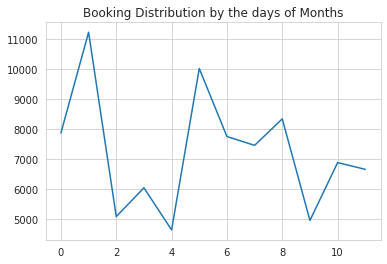

In [27]:
plt.plot(df['arrival_date_month'].value_counts().sort_index().values)
plt.title('Booking Distribution by the days of Months')

There was a peak in reservation before February, probably planning for Spring Break or early Summer Plans. 

Text(0.5, 1.0, 'Number of Bookings by Year')

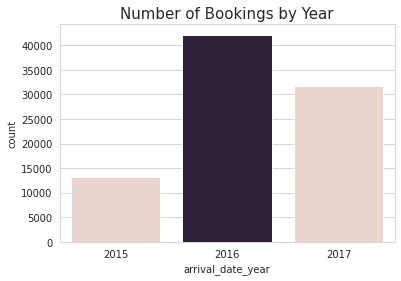

In [28]:
ax = sns.countplot(df['arrival_date_year'], palette=sns.cubehelix_palette(2))
plt.title('Number of Bookings by Year', fontsize=15)

- Our samples are mostly in 2016. 

Text(0.5, 1.0, 'Cancelation Situation by Months')

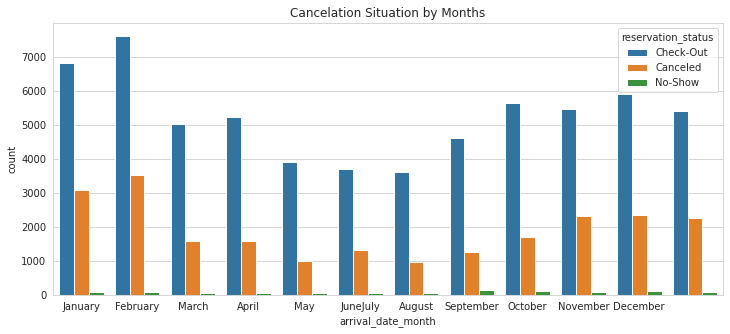

In [29]:
plt.figure(figsize=(12,5))
sns.countplot(df['arrival_date_month'], hue=df['reservation_status'])
plt.xticks(np.arange(0,11),["January", "February", "March", "April","May","June"
"July","August","September","October","November","December"])
plt.title('Cancelation Situation by Months')

This chart shows that the cancelation rate is higher for the guests who didn have a special request. 



In [30]:
df.groupby('is_repeated_guest')['reservation_status'].value_counts()

is_repeated_guest  reservation_status
0                  Check-Out             59802
                   Canceled              22760
                   No-Show                 966
1                  Check-Out              3150
                   Canceled                217
                   No-Show                  44
Name: reservation_status, dtype: int64

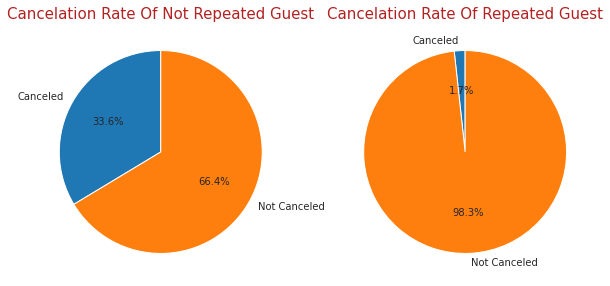

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'aspect': 'equal'})
ax[0].pie([11896,23476], labels=["Canceled","Not Canceled"], autopct='%1.1f%%', startangle=90)
ax[0].set_title("Cancelation Rate Of Not Repeated Guest",color="#b22222",fontsize=15)
ax[1].pie([16,914], labels=["Canceled","Not Canceled"], autopct='%1.1f%%', startangle=90)
ax[1].set_title("Cancelation Rate Of Repeated Guest",color="#b22222",fontsize=15);

- The cancelation rate is higher for not repeated guests compared to repeated ones. 
- Most of the repeated guests didn't cancel. A good sign.  

In [32]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

### **Identifying Outliers**

Text(0.5, 1.0, 'Lead Time by Cancellation')

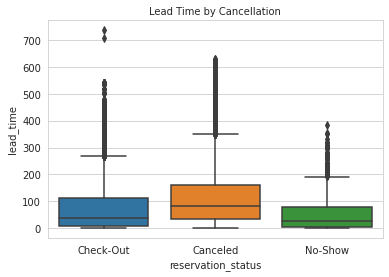

In [33]:
# deploying a boxplot for the booking status
sns.boxplot(df['reservation_status'], df['lead_time'])
plt.title('Lead Time by Cancellation', fontsize=10)

**Bivariate Analysis:**

This shows an interesting insight about cancellations and the 'lead time.' As a reminder, the lead time is the elapsed time between the booking and arrival date. 
There seems to be a higher cancellation rate when the lead time is longer. 

Text(0.5, 1.0, 'Market Segment')

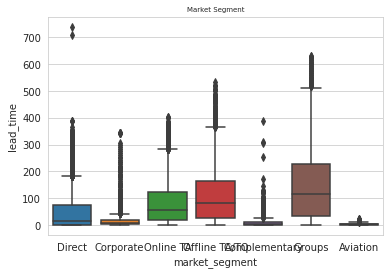

In [34]:
# deploying a boxplot
sns.boxplot(df['market_segment'], df['lead_time'])
plt.title('Market Segment', fontsize=7)

**Bivariate Analysis:**

This boxplot shows that the offline has the most lead time. Online was close too.  More people reserve in person than online. There are outliers to expand the analysis. 

Text(0.5, 1.0, 'Repeated guests reserving on weekends')

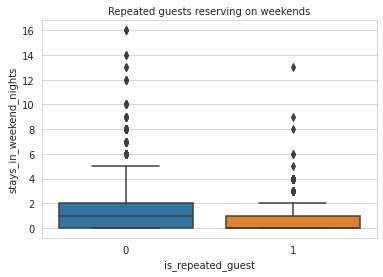

In [35]:
# deploying a boxplot on repeated guests and number of weekened nights
sns.boxplot(df['is_repeated_guest'], df['stays_in_weekend_nights'])
plt.title('Repeated guests reserving on weekends', fontsize=10)

## **Correlation**

<AxesSubplot:>

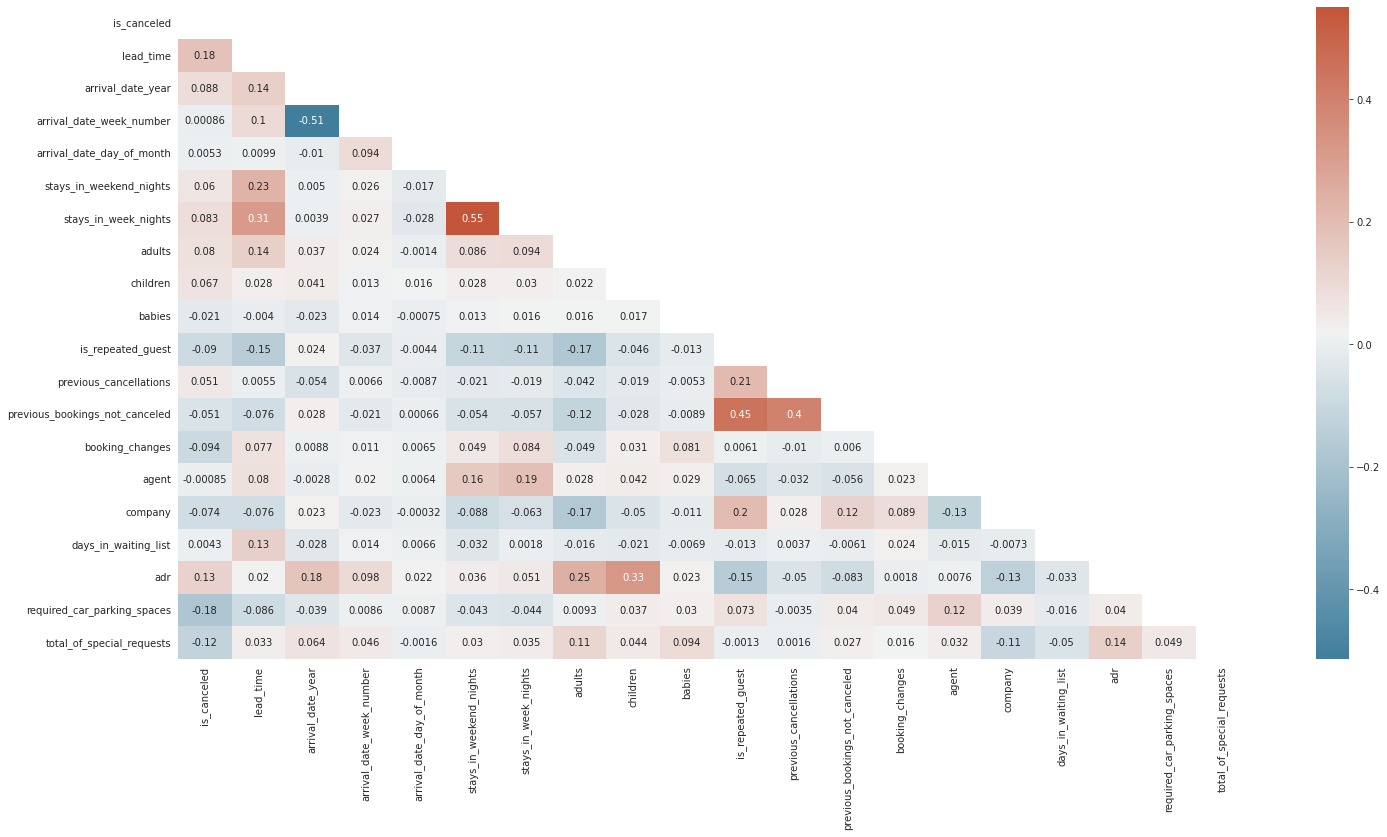

In [36]:
# set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(24,12))
mask = np.triu(np.ones_like(df.corr(), dtype='bool'))
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(df.corr(), annot=True,mask=mask,cmap=cmap)

**Correlation Summary:**

There isn't much of a correlation between the target and the feature variables. The booking status and the lead time had a correlation of 0.44, which is pretty moderate.
The other important thing to note is that there is no correlation greater than 60%. The highest was 0.54 between repeated guests and number of previous bookings not canceled. I have a pie chart to demonstrate the cancelation chart for repeated guests.

# **Model Validation Split**

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86939 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86939 non-null  object 
 1   is_canceled                     86939 non-null  int64  
 2   lead_time                       86939 non-null  int64  
 3   arrival_date_year               86939 non-null  int64  
 4   arrival_date_month              86939 non-null  object 
 5   arrival_date_week_number        86939 non-null  int64  
 6   arrival_date_day_of_month       86939 non-null  int64  
 7   stays_in_weekend_nights         86939 non-null  int64  
 8   stays_in_week_nights            86939 non-null  int64  
 9   adults                          86939 non-null  int64  
 10  children                        86939 non-null  float64
 11  babies                          86939 non-null  int64  
 12  meal                           

## **Feature Engineering**

In [38]:
df['is_canceled'].value_counts(normalize=False)

0    62952
1    23987
Name: is_canceled, dtype: int64

In [39]:
df['is_canceled'].value_counts(normalize=True)

0    0.724094
1    0.275906
Name: is_canceled, dtype: float64

**Feature Engineering Technique:**
we can't have the humans columns to be 0

In [40]:
filter = (df['children'] == 0) & (df['adults'] == 0) & (df['babies'] == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/15
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/15
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/15
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/16
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/17
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/17
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/17


In [41]:
# now no more 0's in those columns
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/17
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/17
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/17
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/17


### **From where the most guests are coming?**

In [42]:
# filter only the countries where booking wasn't canceled
guest_city = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
guest_city.columns = ['Country', '# of Guests']
top_5 = guest_city[:5]
print(f'The top 5 places most guests are coming from:  \n {top_5}. \n')

The top 5 places most guests are coming from:  
   Country  # of Guests
0     PRT        17572
1     GBR         8440
2     FRA         7091
3     ESP         5382
4     DEU         4332. 



In [43]:
import folium 
from folium.plugins import HeatMap
import plotly.express as px

basemap = folium.Map()
guests_map = px.choropleth(guest_city, locations = guest_city['Country'],
                           color = guest_city['# of Guests'], hover_name = guest_city['Country'])
guests_map.show()

### **What are the Room prices overnights for each month?**


In [44]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] ==0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] ==0)]

resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
print(f'The monthly average rates breakdown for Resorts: \n{resort_hotel}\n')


The monthly average rates breakdown for Resorts: 
   arrival_date_month         adr
0               April   77.219541
1              August  182.256818
2            December   64.223176
3            February   53.977059
4             January   48.852694
5                July  151.310650
6                June  109.200465
7               March   57.512456
8                 May   77.818102
9            November   49.162655
10            October   62.830638
11          September   98.744746



In [45]:

city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
print(f'The monthly average rates breakdown for cities: \n{city_hotel}\n')


The monthly average rates breakdown for cities: 
   arrival_date_month         adr
0               April  114.251636
1              August  122.825388
2            December   90.769559
3            February   88.210810
4             January   83.378062
5                July  120.069489
6                June  120.673753
7               March   91.306933
8                 May  124.825944
9            November   88.271798
10            October  105.517410
11          September  116.973279



In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86778 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86778 non-null  object 
 1   is_canceled                     86778 non-null  int64  
 2   lead_time                       86778 non-null  int64  
 3   arrival_date_year               86778 non-null  int64  
 4   arrival_date_month              86778 non-null  object 
 5   arrival_date_week_number        86778 non-null  int64  
 6   arrival_date_day_of_month       86778 non-null  int64  
 7   stays_in_weekend_nights         86778 non-null  int64  
 8   stays_in_week_nights            86778 non-null  int64  
 9   adults                          86778 non-null  int64  
 10  children                        86778 non-null  float64
 11  babies                          86778 non-null  int64  
 12  meal                           

In [47]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 86778 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86778 non-null  object        
 1   is_canceled                     86778 non-null  int64         
 2   lead_time                       86778 non-null  int64         
 3   arrival_date_year               86778 non-null  int64         
 4   arrival_date_month              86778 non-null  object        
 5   arrival_date_week_number        86778 non-null  int64         
 6   arrival_date_day_of_month       86778 non-null  int64         
 7   stays_in_weekend_nights         86778 non-null  int64         
 8   stays_in_week_nights            86778 non-null  int64         
 9   adults                          86778 non-null  int64         
 10  children                        86778 non-null  float64       
 11  b

In [48]:
df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day
df.drop(['reservation_status_date','arrival_date_month'], axis=1, inplace=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,year,month,day
0,Resort Hotel,0,342,2015,27,1,0,0,2,0.0,...,0.0,0,Transient,0.0,0,0,Check-Out,2015,7,1
1,Resort Hotel,0,737,2015,27,1,0,0,2,0.0,...,0.0,0,Transient,0.0,0,0,Check-Out,2015,7,1
2,Resort Hotel,0,7,2015,27,1,0,1,1,0.0,...,0.0,0,Transient,75.0,0,0,Check-Out,2015,7,2
3,Resort Hotel,0,13,2015,27,1,0,1,1,0.0,...,0.0,0,Transient,75.0,0,0,Check-Out,2015,7,2
4,Resort Hotel,0,14,2015,27,1,0,2,2,0.0,...,0.0,0,Transient,98.0,0,1,Check-Out,2015,7,3


In [49]:
df.describe(include='object')

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,86778,86778,86778,86778,86778,86778,86778,86778,86778,86778
unique,2,4,177,7,4,9,11,3,4,3
top,City Hotel,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,53267,67491,27350,51478,68917,56072,46120,85634,71452,62802


In [71]:
df['is_canceled'].unique()

array([0, 1])

In [50]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

In [51]:
# encoding categorical variables
df['hotel'] = df['hotel'].replace({'Resort Hotel':0, 'City Hotel':1})
df['hotel'] = df['hotel'].replace({'Resort Hotel':0, 'City Hotel':1})
df['meal'] = df['meal'].replace({'BB':0, 'FB':1,'HB':2,'SC':3,'Undefined':4})
df['meal'] = df['meal'].replace({'BB':0, 'FB':1,'HB':2,'SC':3,'Undefined':4})
df['market_segment'] = df['market_segment'].replace({'Direct':0, 'Corporate':1,'Online TA':2,'Offline TA/TO':3,'Complementary':4,
                                                     'Groups':5,'Aviation':6})
df['reserved_room_type'] = df['reserved_room_type'].replace({'C':0, 'A':1,'D':2,'E':3,'G':4,'F':5,'H':6,
                                                             'L':7,'B':8})
df['distribution_channel'] = df['distribution_channel'].replace({'Direct':0, 'Corporate':1,'TA/TO':2,'Undefined':3,'GDS':4})
df['customer_type'] = df['customer_type'].replace({'Transient':0, 'Contract':1,'Transient-Party':2,'Group':3})
df['deposit_type'] = df['deposit_type'].replace({'No Deposit':0, 'Refundable':1,'Non Refund':3})
df['year'] = df['year'].replace({2014:0,2015:1,2016:2,2017:3})


In [67]:
df['assigned_room_type'].value_counts()

A    46120
D    22265
E     7123
F     3608
G     2481
C     2139
B     1807
H      702
I      347
K      185
L        1
Name: assigned_room_type, dtype: int64

# **Preprocessing**

In [74]:
# separating the feature and target column 

X = df.drop(columns=['is_canceled','country','assigned_room_type', 'reservation_status', 'days_in_waiting_list','arrival_date_year' ], axis=1)
y = df['is_canceled']

In [75]:
# split 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [63]:
# get the shape of train and test data
print('train size X: ',X_train.shape)
print('train size y: ',y_train.shape)
print('train size X: ',X_test.shape)
print('train size y: ',y_test.shape)

train size X:  (65083, 31)
train size y:  (65083,)
train size X:  (21695, 31)
train size y:  (21695,)


In [57]:
# instantiate the column selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [77]:
# feature scaling and one hot encoding 
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [78]:
# create tuples
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

In [79]:
# create the preprocessor 
preproccessor = make_column_transformer(num_tuple,cat_tuple,remainder='drop')

# **Logistic Regression Model**

## **Default Model**

In [80]:
# making an instance of a model 
logreg = LogisticRegression(class_weight=None)

# create a pipeline
logreg_pipe = make_pipeline(scaler,logreg)

# fit the log reg model
logreg_pipe.fit(X_train,y_train)
print(logreg_pipe.score(X_train,y_train))
print(logreg_pipe.score(X_test,y_test))

0.7993024292057834
0.799815625720212


In [81]:
logreg_train_preds = logreg_pipe.predict(X_train)
logreg_test_preds = logreg_pipe.predict(X_test)

## **Metrics**

In [82]:
# creating multiple classification report
print(classification_report(y_test, logreg_test_preds))

              precision    recall  f1-score   support

           0       0.81      0.96      0.87     15767
           1       0.77      0.38      0.51      5928

    accuracy                           0.80     21695
   macro avg       0.79      0.67      0.69     21695
weighted avg       0.79      0.80      0.78     21695



We got a 0.63 f1-score on our model created using default parameters. I am going to increase my model performance and evaluate again.



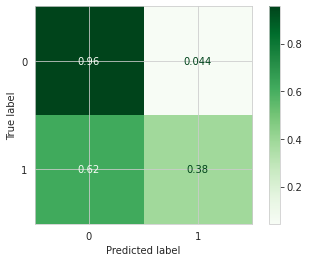

In [83]:
# create a confusion matrix with the test data
ConfusionMatrixDisplay.from_predictions(y_test, logreg_test_preds,
                                         normalize='true',cmap='Greens');

## **Balancing the Class Weight**

              precision    recall  f1-score   support

           0       0.87      0.66      0.75     15767
           1       0.45      0.74      0.56      5928

    accuracy                           0.68     21695
   macro avg       0.66      0.70      0.65     21695
weighted avg       0.76      0.68      0.70     21695



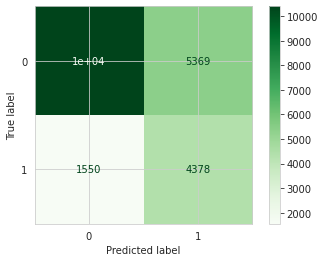

In [84]:
#Instantiate the pipeline with the scaler and weighted model
log_reg_weighted = LogisticRegression(max_iter=1000, class_weight='balanced')

# creating a pipeline
log_reg_weighted_pipe = make_pipeline(scaler, log_reg_weighted)

#Fit and evaluate the model
log_reg_weighted_pipe.fit(X_train, y_train)

# Evaluate the logistic regression pipe using function
evaluate_classification(log_reg_weighted_pipe, X_test, y_test)

{0.0001: 0.7267573173542291,
 0.001: 0.7666282553583775,
 0.01: 0.7950679880156718,
 0.1: 0.7988015671813782,
 1: 0.800046093569947,
 10: 0.800414842129523,
 100: 0.800507029269417,
 1000: 0.800507029269417}

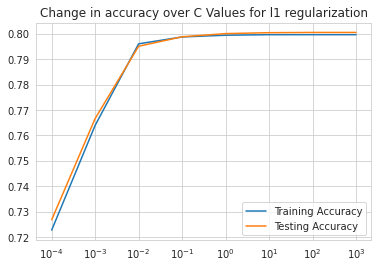

In [85]:
# create a list of c values and empty list for scores
c_values = [0.0001,0.001,0.01,0.1,1,10,100,1000]
train_scores = []
test_scores = []
# iterating over the c values
for c in c_values:

  # instantiate a model with each value of c and fit the model
  log_reg = LogisticRegression(C=c, max_iter=1000,solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train,y_train)
  test_preds_l1 =log_reg_pipe.predict(X_test)


  # add the training and testing scores to the score lists
  train_scores.append(log_reg_pipe.score(X_train,y_train))
  test_scores.append(log_reg_pipe.score(X_test,y_test))

# plot the change in accuracy as the c values changes
figm,ax = plt.subplots(1,1)
ax.plot(c_values,train_scores,label='Training Accuracy')
ax.plot(c_values,test_scores,label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C Values for l1 regularization')
ax.legend()

ax.set_xscale('log')

# print a dictionary of values of c and accuracy scores
{c:score for c, score in zip(c_values,test_scores)} 

{0.0001: 0.7499884766075132,
 0.001: 0.7889375432127218,
 0.01: 0.7972804793731274,
 0.1: 0.7990320350311132,
 1: 0.799815625720212,
 10: 0.800414842129523,
 100: 0.8005992164093109,
 1000: 0.8007374971191519}

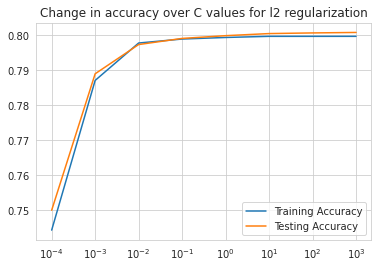

In [86]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='lbfgs', penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

## **SMOTE**

In [87]:
pd.Series(y_train).value_counts()

0    47035
1    18048
Name: is_canceled, dtype: int64

In [88]:
smote = SMOTE(sampling_strategy='auto')


X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
pd.Series(y_train_smote).value_counts()

1    47035
0    47035
Name: is_canceled, dtype: int64

In [89]:
log_reg_smote = LogisticRegression(max_iter = 1000)

log_reg_smote_pipe = smote_pipe(scaler, smote, log_reg_smote)
log_reg_smote_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

### **Metrics**

              precision    recall  f1-score   support

           0       0.81      0.96      0.87     15767
           1       0.77      0.39      0.52      5928

    accuracy                           0.80     21695
   macro avg       0.79      0.67      0.70     21695
weighted avg       0.80      0.80      0.78     21695



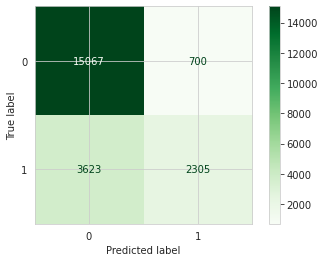

              precision    recall  f1-score   support

           0       0.87      0.66      0.75     15767
           1       0.45      0.74      0.56      5928

    accuracy                           0.68     21695
   macro avg       0.66      0.70      0.65     21695
weighted avg       0.76      0.68      0.70     21695



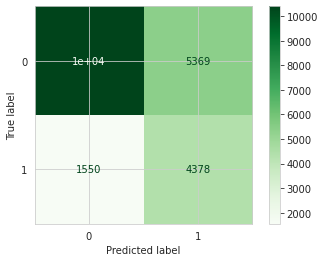

              precision    recall  f1-score   support

           0       0.87      0.66      0.75     15767
           1       0.45      0.73      0.56      5928

    accuracy                           0.68     21695
   macro avg       0.66      0.70      0.66     21695
weighted avg       0.76      0.68      0.70     21695



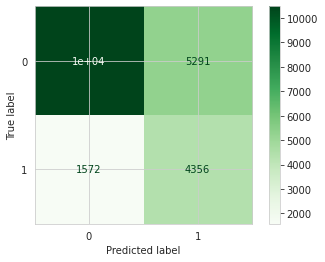

In [90]:
models = [log_reg_pipe, log_reg_weighted_pipe, log_reg_smote_pipe]
for model in models:
  evaluate_classification(model, X_test, y_test)

## **Changing the Decision Threshold**

In [91]:
# retrieving the predicted probabilities instead of predicted classes 
train_probs = log_reg_pipe.predict_proba(X_train)
test_probs = log_reg_pipe.predict_proba(X_test)

In [92]:
# display the first 5 training probabilities
train_probs[:5]

array([[0.80144695, 0.19855305],
       [0.72808194, 0.27191806],
       [0.7167938 , 0.2832062 ],
       [0.55968204, 0.44031796],
       [0.59545634, 0.40454366]])

In [93]:
# setting the threshold value to 0.4
thresh = 0.4

# using a list comprehension to apply the new threshold value to the second value in each prediction
train_thresh = [1 if x[1] > thresh else 0 for x in train_probs]
test_thresh = [1 if x[1] > thresh else 0 for x in test_probs]

print(f'Predictions with the default decision threshold of .5')
print(logreg_train_preds[:5], '\n')

print(f'Predictions with a decision threshold of {thresh}')
print(train_thresh[:5], '\n')

print('True Labels')
print(y_train[:5].values)

Predictions with the default decision threshold of .5
[0 0 0 0 0] 

Predictions with a decision threshold of 0.4
[0, 0, 0, 1, 1] 

True Labels
[1 0 0 0 1]


## **Comparing Confusion Matrices**

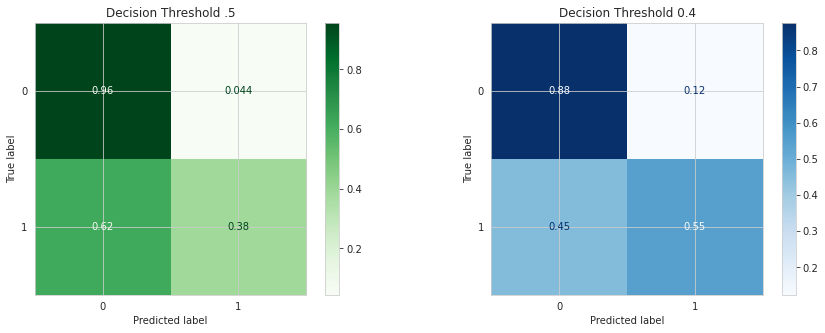

In [94]:
# plotting confusion for both the default and the new value
fig, axes = plt.subplots(1,2, figsize=(15,5))

## Confusion Matrix for default threshold value of .5
ConfusionMatrixDisplay.from_predictions(y_test, logreg_test_preds, 
               normalize='true',  cmap='Greens',              
               ax=axes[0])
axes[0].set_title('Decision Threshold .5')

## Confusion Matrix for threshold value of thresh
ConfusionMatrixDisplay.from_predictions(y_test, test_thresh, 
               normalize='true',  cmap='Blues',
               ax=axes[1])
axes[1].set_title(f'Decision Threshold {thresh}');

## **Loop Over Decision Thresholds**

In [95]:
# an array of about 20 thresholds
thresholds = np.array(range(0,105,5)) / 100
thresholds[:5]

array([0.  , 0.05, 0.1 , 0.15, 0.2 ])

Text(0, 0.5, 'Accuracy Score')

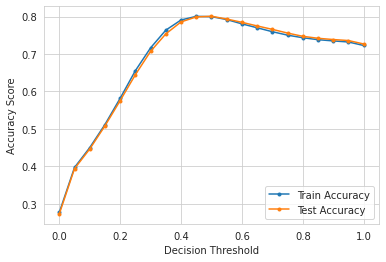

In [96]:
## Create a scores_df to store Accuracy Scores
# creating a score dataframe to save the accuracy scores 
score_df = pd.DataFrame(index=thresholds, columns=['Train Accuracy','Test Accuracy'])

# a for loop 
for thresh in thresholds:

  # getting the predicted classes for both datasets
  train_thresh = [1 if x[1] > thresh else 0 for x in train_probs]
  test_thresh = [1 if x[1] > thresh else 0 for x in test_probs]

  # save the training and testing accuracy scores to the scores_df
  score_df.loc[thresh, 'Train Accuracy'] = accuracy_score(train_thresh, y_train)
  score_df.loc[thresh, 'Test Accuracy'] = accuracy_score(test_thresh, y_test)

# dispay the results 
score_df.plot(marker='.')
plt.xlabel('Decision Threshold')
plt.ylabel('Accuracy Score')

In [97]:
# sorting the scores dataframe
score_df.sort_values(by='Test Accuracy', ascending=False).head()

,Train Accuracy,Test Accuracy
0.50,0.799625,0.800737
0.45,0.800486,0.798986
0.55,0.791912,0.79327
0.40,0.790759,0.785573
0.60,0.780388,0.784513


## **Displaying the ROC Curve**

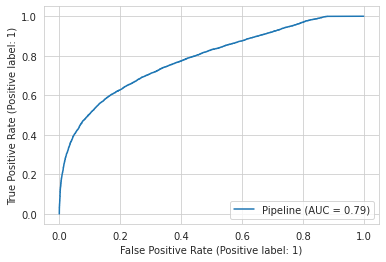

In [98]:
## Display the ROC Curve
RocCurveDisplay.from_estimator(log_reg_pipe, X_test, y_test);

# **K-Nearest Neighbor Model**

## **Base KNN Model**

In [100]:
# Create an instance of the model
knn = KNeighborsClassifier()
# Create a model pipeline
knn_pipe = make_pipeline(scaler, knn)
# Fit the model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [101]:
# Save the model's predictions for the train dataset
knn_train_preds = knn_pipe.predict(X_train)
# Save the model's predictions for the test dataset
knn_test_preds = knn_pipe.predict(X_test)

In [105]:
# Calculate the Confusion Matrices
knn_test_confusion_matrix = confusion_matrix(y_test, knn_test_preds)

In [106]:
# displaying the Confusion Matrices
print(f'KNN Confusion Matrix:\n {knn_test_confusion_matrix}')

KNN Confusion Matrix:
 [[15154   613]
 [ 2239  3689]]


In [107]:
# displaying the metrics for the knn model
knn_test_report = classification_report(y_test, knn_test_preds)   
print(f'KNN Test Report: \n {knn_test_report}')                                   

KNN Test Report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     15767
           1       0.86      0.62      0.72      5928

    accuracy                           0.87     21695
   macro avg       0.86      0.79      0.82     21695
weighted avg       0.87      0.87      0.86     21695



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     47035
           1       0.94      0.71      0.81     18048

    accuracy                           0.91     65083
   macro avg       0.92      0.84      0.87     65083
weighted avg       0.91      0.91      0.90     65083



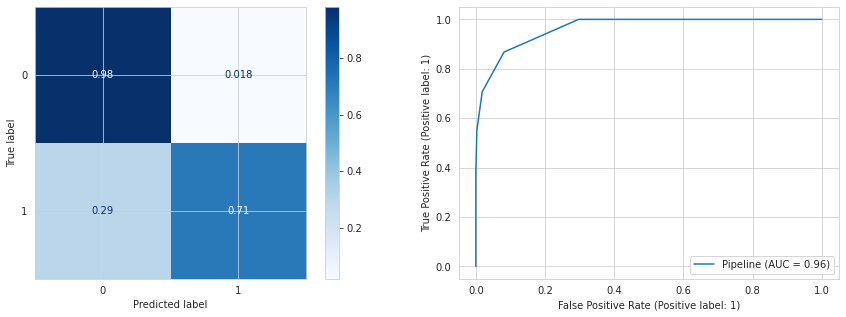

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     15767
           1       0.86      0.62      0.72      5928

    accuracy                           0.87     21695
   macro avg       0.86      0.79      0.82     21695
weighted avg       0.87      0.87      0.86     21695



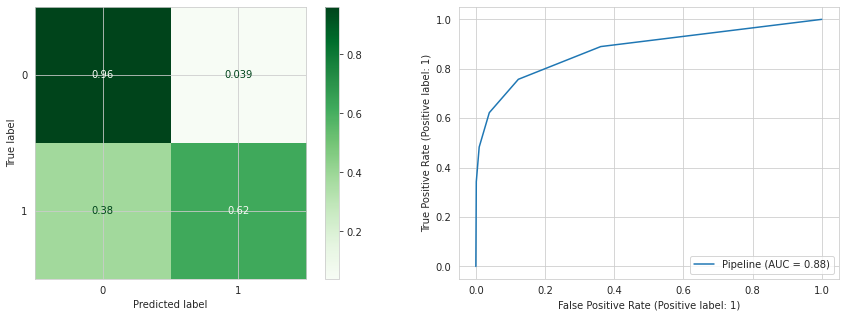

In [108]:
## Use the function twice to evaluate our model on training AND test data
classification_metrics(knn_pipe, X_train,y_train, 
                         cmap='Blues', label='Training Data')
classification_metrics(knn_pipe, X_test,y_test, 
                         cmap='Greens',label='Test Data')

## **Creating a processing pipeline that applies PCA.**

In [109]:
# Create a scaler
scaler = StandardScaler()
# Create a PCA object that will retain 95% of the variance when transforming
pca = PCA(n_components=0.95)
# Combine the scaler and the PCA in a pipeline.
pipe = make_pipeline(scaler, pca)
# Transform the training data and check shape of new features after applying PCA
pipe.fit_transform(X_train)

array([[ 0.38302818, -0.0438903 , -0.03880258, ...,  0.20311783,
         0.15299133,  0.93066212],
       [ 1.46203784,  1.35579591,  2.93940542, ...,  2.05009285,
        -0.40549341, -0.15132387],
       [-0.35253387,  0.53947207,  0.76831554, ..., -0.55601901,
        -0.21193974, -1.23900267],
       ...,
       [ 0.88225667,  1.56429739, -1.44906762, ..., -0.00475739,
         0.13001754,  1.04593231],
       [-1.04739164, -0.72553255,  0.23102158, ...,  0.16767973,
         0.2419123 ,  1.4826066 ],
       [ 4.14977965, -0.65088707,  0.92260291, ...,  0.19862559,
         1.50597415, -1.07538054]])

In [110]:
%%time
# Create and fit a KNN model WITH PCA 
knn = KNeighborsClassifier()
pca = PCA() 

knnpca = make_pipeline(pipe, knn)

knnpca.fit(X_train, y_train)

CPU times: user 168 ms, sys: 25.2 ms, total: 193 ms
Wall time: 123 ms


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.95))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [111]:
%%time
# Make predictions and evaluate the model using classification_report
pca_pred = knnpca.predict(X_test)

print('PCA Predictions',classification_report(y_test, pca_pred))

PCA Predictions               precision    recall  f1-score   support

           0       0.86      0.95      0.90     15767
           1       0.80      0.58      0.67      5928

    accuracy                           0.85     21695
   macro avg       0.83      0.76      0.79     21695
weighted avg       0.84      0.85      0.84     21695

CPU times: user 14.2 s, sys: 89.7 ms, total: 14.3 s
Wall time: 9.25 s


## **Tune the Hyperparameters**

In [112]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [113]:
# Tune K utilizing a loop  
krange = range(1,15)
k_list = []
for k in krange:
  knn_pipe = make_pipeline(KNeighborsClassifier(n_neighbors=k))
  knn_pipe.fit(X_train,y_train)
  score = accuracy_score(y_test, knn_pipe.predict(X_test))
  k_list.append(score)

Text(0.5, 1.0, 'Finding the optimal ')

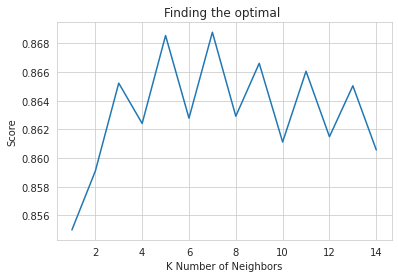

In [114]:
# visualize accuracy scores 
plt.plot(krange, k_list)
plt.xlabel('K Number of Neighbors')
plt.ylabel('Score')
plt.title('Finding the optimal ')

In [115]:
# create an instance of the best model 
knn = KNeighborsClassifier(n_neighbors=7)
# create a model pipeline
knn_pipe = make_pipeline(scaler, knn)
# fit the model
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7))])

In [117]:
# saving the model's predictions for the train dataset
knn_train_preds = knn_pipe.predict(X_train)
# saving the model's predictions for the test dataset
knn_test_preds = knn_pipe.predict(X_test)

In [118]:
# classification report for the test dataset
knn_test_report = classification_report(y_test, knn_test_preds)

In [119]:
# Print the Classification Report
print('Classification Report for Test\n')
print(knn_test_report)

Classification Report for Test

              precision    recall  f1-score   support

           0       0.87      0.97      0.91     15767
           1       0.88      0.61      0.72      5928

    accuracy                           0.87     21695
   macro avg       0.87      0.79      0.82     21695
weighted avg       0.87      0.87      0.86     21695



## **GridSearchCV**

In [120]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=7),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 7,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [121]:
pipe_param_grid = {'kneighborsclassifier__n_neighbors': range(1,12),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['uniform']}

In [ ]:
knn_pipe_gs = GridSearchCV(knn_pipe, pipe_param_grid)

knn_pipe_gs.fit(X_train, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test, y_test)}')

# **Decision Tree Classification Model**

In [122]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [123]:
# predict the model
dtc_pred = dtc.predict(X_test)

## **Metrics**

In [125]:
# evaluate the Decision Tree Classification Model
print('CLF Report',classification_report(y_test, dtc_pred))

CLF Report               precision    recall  f1-score   support

           0       0.95      0.95      0.95     15767
           1       0.87      0.87      0.87      5928

    accuracy                           0.93     21695
   macro avg       0.91      0.91      0.91     21695
weighted avg       0.93      0.93      0.93     21695



In [126]:
# creating the confusion matrix
conf = confusion_matrix(y_test, dtc_pred)
print(f'Confusion Matrix:\n {conf}\n')

Confusion Matrix:
 [[14980   787]
 [  755  5173]]



# **Random Forest Algorithm**

In [127]:
# making an instance of the model 
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [130]:
rf_predict = rf.predict(X_test)

## **Metrics**

In [131]:
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     15767
           1       0.97      0.74      0.84      5928

    accuracy                           0.92     21695
   macro avg       0.94      0.87      0.90     21695
weighted avg       0.93      0.92      0.92     21695



In [133]:
# displaying the confusion matrix
rf_conf = confusion_matrix(y_test, rf_predict)
rf_conf

array([[15631,   136],
       [ 1526,  4402]])

# **Best Model For Analysis**

In [134]:
# evaluate the Decision Tree Classification Model
print('CLF Report',classification_report(y_test, dtc_pred))

CLF Report               precision    recall  f1-score   support

           0       0.95      0.95      0.95     15767
           1       0.87      0.87      0.87      5928

    accuracy                           0.93     21695
   macro avg       0.91      0.91      0.91     21695
weighted avg       0.93      0.93      0.93     21695



The best possible model for this dataset would be the Decision Tree Classification Model.  The accuracy was 93%.  The recall and f1-score on Class 1 are 87%. 